Import useful modules:

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm
import random
import warnings
warnings.filterwarnings("ignore")

Define country codes using the ISO 3166-1 alpha-3 standard:

In [2]:
Europe_ia3 = {  
            'Albania':'ALB',
            'Austria':'AUT',
            'Bosnia_Herzegovina':'BIH', 
            'Belgium':'BEL',
            'Bulgaria':'BGR', 
            'Switzerland':'CHE', 
            'Czech_Republic':'CZE', 
            'Germany':'DEU', 
            'Denmark':'DNK', 
            'Estonia':'EST', 
            'Spain':'ESP', 
            'Finland':'FIN', 
            'France':'FRA', 
            'United_Kingdom':'GBR', 
            'Greece':'GRC', 
            'Croatia':'HRV', 
            'Hungary':'HUN', 
            'Ireland':'IRL', 
            'Italy':'ITA',
            'Kosovo':'XKO',
            'Lithuania':'LTU', 
            'Luxembourg':'LUX', 
            'Latvia':'LVA',
            'Moldova':'MDA',
            'Montenegro':'MNE', 
            'Macedonia':'MKD', 
            'Netherlands':'NLD', 
            'Norway':'NOR',
            'Ukraine':'UKR',
            'Poland':'POL', 
            'Portugal':'PRT', 
            'Romania':'ROU', 
            'Serbia':'SRB', 
            'Sweden':'SWE', 
            'Slovenia':'SVN', 
            'Slovakia':'SVK'
            }

Use basemap to initialize a map. Define geographical domain, map projection, resolution, and coordinate of the center.

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,20))
m_plot = Basemap(width=11500000/2.5,height=9000000/2.2,projection='laea',
                  resolution='i',lat_0=54.5,lon_0=10,ax=ax)
plt.close(fig)

Here is the data that you want to visualize in the map. To examplify how the data does not have to be uniform, we generate and allocate random values to all considered countries.

In [4]:
data_range = [0,100]
data_example = random.sample(range(data_range[0],data_range[1]), len(Europe_ia3.keys()))
df = pd.DataFrame(index=Europe_ia3.keys(),
                 data=data_example,columns=['data'])

In [5]:
df.head()

,data
Albania,88
Austria,17
Bosnia_Herzegovina,8
Belgium,11
Bulgaria,60


Choose colormap and datarange for color bar:

In [6]:
cmap = cm.get_cmap('Blues', 12)
norm=plt.Normalize(data_range[0],data_range[1])

Plot data:

In [7]:
for c in Europe_ia3.keys():
    m_plot.readshapefile('shapefiles/gadm36_' + Europe_ia3[c] + '_0',c,drawbounds=True,linewidth = 0,color='k')
    patches = []
    value = df.loc[c].item()
    for info, shape in zip(eval('m_plot.' + c + '_info'), eval('m_plot.' + c)):
        patches.append(Polygon(np.array(shape), True))
    patch1=ax.add_collection(PatchCollection(patches, facecolor= cmap(norm(value))))

Add color bar:

In [8]:
cb_ax = fig.add_axes([0.95,0.335,0.02,0.21])
cb1 = mpl.colorbar.ColorbarBase(cb_ax,
                                orientation='vertical', 
                                cmap=cmap,norm=norm,
                                boundaries=np.arange(data_range[0],data_range[1])
                               )

cb1.set_label('Data',zorder=10,fontsize=15)
cb1.ax.tick_params(labelsize=15)

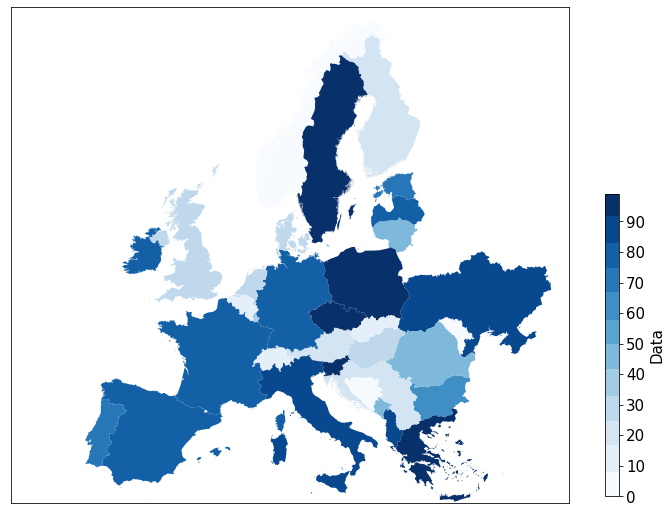

In [9]:
fig

In [10]:
fig.savefig('national_colors.png',dpi=300,bbox_inches='tight')  